In [1]:
#scrip more tech job description?
#!pip install wordcloud

In [2]:
import pandas as pd
import string

In [3]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [39]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load the data from the other directory
df=pd.read_csv('../raw_data/Train_rev1.csv')

In [5]:
#drop null rows
df=df.dropna(axis=0, how='any')
df

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
2020,51860115,Financial Accountant,A leading Insurance/Reinsurance Business is cu...,London,London,full_time,permanent,CMC Consulting Limited,Accounting & Finance Jobs,"40,000 - 50,000 + Bonus + B",45000,myjobs.cimaglobal.com
2089,52314212,Commercial Finance Analyst,"Our client, has an unrivalled opportunity for ...",Bedfordshire,Bedfordshire,full_time,permanent,CMC Consulting Limited,Accounting & Finance Jobs,"25,000 - 35,000",30000,myjobs.cimaglobal.com
2228,53633132,Financial Accountant,"Our client, a leading Insurance company, is cu...",London,London,full_time,permanent,CMC Consulting Limited,Accounting & Finance Jobs,"40,000 - 45,000 + Bonus + B",42500,myjobs.cimaglobal.com
2229,53636956,Commercial Analyst,"My client, a market leading software company, ...",Berkshire,Berkshire,full_time,permanent,CMC Consulting Limited,Accounting & Finance Jobs,"50,000 - 55,000 + Benefits",52500,myjobs.cimaglobal.com
2341,54664853,Teachers,iday s unrivalled originality has captured the...,Norfolk,Norfolk,part_time,contract,Engage Education,Teaching Jobs,100 - 145/day,29400,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...,...,...
244746,72703432,"Salaried GP, Essex, 4 days per week, ****k NH...","Salaried GP needed in Essex, 4 days per week. ...","Essex, South East",UK,full_time,permanent,Global Medics Permanent UK,Healthcare & Nursing Jobs,"Up to 81k, 4 days per week + NHS Pension + MDU",81000,jobs.gponline.com
244747,72703435,Long Haul Travel Consultant Staffordshire,Are you a Travel Consultant who is truly passi...,Staffordshire,Staffordshire,full_time,permanent,Travel Trade Recruitment,Travel Jobs,13000 - 17000 per annum + Fantastic company an...,15000,jobs.travelweekly.co.uk
244748,72703444,Home Working Cruise Consultant,"Travel Consultants, we have an amazing opportu...",West Midlands,West Midlands,full_time,permanent,Travel Trade Recruitment,Travel Jobs,15000 per annum + Excellent Uncapped OTE!,15000,jobs.travelweekly.co.uk
244749,72703454,Personal Travel Expert Luxury Travel,PERSONAL TRAVEL EXPERT Location Birmingham Sa...,Birmingham,Birmingham,full_time,permanent,AA Appointments,Travel Jobs,18000 - 22000 per annum + competitive,20000,jobs.travelweekly.co.uk


In [6]:
#drop unusefull info
df=df.drop(columns=['Id',
                    'LocationRaw',
                    'LocationNormalized',
                    'ContractType',
                    'ContractTime',
                    'Company',
                    'SalaryRaw',
                    'SourceName'])
df

,Title,FullDescription,Category,SalaryNormalized
2020,Financial Accountant,A leading Insurance/Reinsurance Business is cu...,Accounting & Finance Jobs,45000
2089,Commercial Finance Analyst,"Our client, has an unrivalled opportunity for ...",Accounting & Finance Jobs,30000
2228,Financial Accountant,"Our client, a leading Insurance company, is cu...",Accounting & Finance Jobs,42500
2229,Commercial Analyst,"My client, a market leading software company, ...",Accounting & Finance Jobs,52500
2341,Teachers,iday s unrivalled originality has captured the...,Teaching Jobs,29400
...,...,...,...,...
244746,"Salaried GP, Essex, 4 days per week, ****k NH...","Salaried GP needed in Essex, 4 days per week. ...",Healthcare & Nursing Jobs,81000
244747,Long Haul Travel Consultant Staffordshire,Are you a Travel Consultant who is truly passi...,Travel Jobs,15000
244748,Home Working Cruise Consultant,"Travel Consultants, we have an amazing opportu...",Travel Jobs,15000
244749,Personal Travel Expert Luxury Travel,PERSONAL TRAVEL EXPERT Location Birmingham Sa...,Travel Jobs,20000


In [7]:
df=df.loc[df['Category']=='IT Jobs']
df

,Title,FullDescription,Category,SalaryNormalized
2459,SOFTWARE QUALITY ENGINEER,SOFTWARE QUALITY ENGINEER / REALTIME EMBEDDED ...,IT Jobs,53760
2460,Account Manager Recruitment,The Company Our client is a leading Technical ...,IT Jobs,57500
2461,cnc miller,CNC Miller Required for a Tempperm position fo...,IT Jobs,23400
2462,Management Accountant,The Company Our client is a 50 Million turnove...,IT Jobs,42500
2463,Assembly Technician / Electromech assembler,Assembly Technician / Electromech assembler We...,IT Jobs,15360
...,...,...,...,...
240791,Business Analyst,Business Analyst **** ****K Milton Keynes M...,IT Jobs,37500
240792,Business Systems Analyst,URGENT Requirement: Business Systems Analyst S...,IT Jobs,41500
240793,Infrastructure Security Engineer,Infrastructure Security Engineer Greater Lond...,IT Jobs,42000
240794,"Test Manager ISEB, ITIL, Leeds","Test Manager Leeds, West Yorkshire, Software ...",IT Jobs,35000


In [8]:
df.shape

(3925, 4)

In [9]:
#remove punctuation
def remove_punctuation(text):
    for punctuation in string.punctuation: 
        text = text.replace(punctuation, ' ') 
    return text

In [10]:
df['Title'] = df['Title'].apply(remove_punctuation)
df['FullDescription'] = df['FullDescription'].apply(remove_punctuation)
df

/tmp/ipykernel_919/4581839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(remove_punctuation)
/tmp/ipykernel_919/4581839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FullDescription'] = df['FullDescription'].apply(remove_punctuation)


,Title,FullDescription,Category,SalaryNormalized
2459,SOFTWARE QUALITY ENGINEER,SOFTWARE QUALITY ENGINEER REALTIME EMBEDDED ...,IT Jobs,53760
2460,Account Manager Recruitment,The Company Our client is a leading Technical ...,IT Jobs,57500
2461,cnc miller,CNC Miller Required for a Tempperm position fo...,IT Jobs,23400
2462,Management Accountant,The Company Our client is a 50 Million turnove...,IT Jobs,42500
2463,Assembly Technician Electromech assembler,Assembly Technician Electromech assembler We...,IT Jobs,15360
...,...,...,...,...
240791,Business Analyst,Business Analyst K Milton Keynes M...,IT Jobs,37500
240792,Business Systems Analyst,URGENT Requirement Business Systems Analyst S...,IT Jobs,41500
240793,Infrastructure Security Engineer,Infrastructure Security Engineer Greater Lond...,IT Jobs,42000
240794,Test Manager ISEB ITIL Leeds,Test Manager Leeds West Yorkshire Software ...,IT Jobs,35000


In [44]:
#lower case of all context
def lowercase (text): 
    lowercased = text.lower() 
    return lowercased

In [45]:
df['Title'] = df['Title'].apply(lowercase)
df['FullDescription'] = df['FullDescription'].apply(lowercase)
df

/tmp/ipykernel_919/2261292647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(lowercase)
/tmp/ipykernel_919/2261292647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FullDescription'] = df['FullDescription'].apply(lowercase)


,Title,FullDescription,Category,SalaryNormalized
2459,software quality engineer,software quality engineer realtime embedded qu...,IT Jobs,53760
2460,account manager recruitment,the company our client leading technical recru...,IT Jobs,57500
2461,cnc miller,cnc miller required tempperm position client w...,IT Jobs,23400
2462,management accountant,the company our client million turnover busine...,IT Jobs,42500
2463,assembly technician electromech assembler,assembly technician electromech assembler we c...,IT Jobs,15360
...,...,...,...,...
240791,business analyst,business analyst k milton keynes my client glo...,IT Jobs,37500
240792,business systems analyst,urgent requirement business systems analyst sa...,IT Jobs,41500
240793,infrastructure security engineer,infrastructure security engineer greater londo...,IT Jobs,42000
240794,test manager iseb itil leeds,test manager leeds west yorkshire software qua...,IT Jobs,35000


In [11]:
#remove numbers
def remove_numbers (text):
    words_only = ''.join([i for i in text if not i.isdigit()])
    return words_only

In [12]:
df['Title'] = df['Title'].apply(remove_numbers)
df['FullDescription'] = df['FullDescription'].apply(remove_numbers)
df

/tmp/ipykernel_919/1030855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(remove_numbers)
/tmp/ipykernel_919/1030855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FullDescription'] = df['FullDescription'].apply(remove_numbers)


,Title,FullDescription,Category,SalaryNormalized
2459,SOFTWARE QUALITY ENGINEER,SOFTWARE QUALITY ENGINEER REALTIME EMBEDDED ...,IT Jobs,53760
2460,Account Manager Recruitment,The Company Our client is a leading Technical ...,IT Jobs,57500
2461,cnc miller,CNC Miller Required for a Tempperm position fo...,IT Jobs,23400
2462,Management Accountant,The Company Our client is a Million turnover ...,IT Jobs,42500
2463,Assembly Technician Electromech assembler,Assembly Technician Electromech assembler We...,IT Jobs,15360
...,...,...,...,...
240791,Business Analyst,Business Analyst K Milton Keynes M...,IT Jobs,37500
240792,Business Systems Analyst,URGENT Requirement Business Systems Analyst S...,IT Jobs,41500
240793,Infrastructure Security Engineer,Infrastructure Security Engineer Greater Lond...,IT Jobs,42000
240794,Test Manager ISEB ITIL Leeds,Test Manager Leeds West Yorkshire Software ...,IT Jobs,35000


In [13]:
#remove stopwords
from nltk.corpus import stopwords 
from nltk import word_tokenize

stop_words = set(stopwords.words('english')) 

# Create function
def remove_stopwords (text):
    tokenized = word_tokenize(text)
    without_stopwords = [word for word in tokenized if not word in stop_words]
    return without_stopwords

In [58]:
print(stop_words)

{'weren', 'or', 'don', "you'll", 'haven', 'from', 'were', 'hers', 'below', 'down', 'isn', 'he', 'an', "aren't", 'does', 'not', 'our', 'too', "wouldn't", 'are', 'up', 'there', 'was', 'above', 'being', "won't", 'needn', 'have', 'between', 'my', 'out', 'no', 'y', 'themselves', 'wasn', 'during', 'for', 'through', 'will', 'been', 'she', 'further', 'has', 'off', "needn't", 'had', 'mustn', 'it', "shan't", 're', "isn't", 'but', 'over', 'again', "don't", 've', 'yours', "didn't", 'be', 'll', 'if', 'both', 'theirs', 'here', 'of', 'own', 'i', 'a', 'won', 'ma', 'mightn', 'that', 'her', 'as', 'than', 't', 'having', 'nor', 'their', 'some', 'who', 'to', 'how', 'what', "it's", 'now', 'ain', 'ourselves', 'in', "you'd", 'aren', "haven't", 'his', 'just', 'doesn', "doesn't", 'by', 'and', 'hadn', 'yourself', 'these', 'so', 'do', 'they', 'once', 'on', "hasn't", "weren't", 'herself', 'you', "should've", 'after', 'its', 'more', "that'll", 'didn', 'until', 'when', 'me', 'him', "you've", 'against', 'about', 'wit

In [14]:
df['Title'] = df['Title'].apply(remove_stopwords)
df['FullDescription'] = df['FullDescription'].apply(remove_stopwords)
df

/tmp/ipykernel_919/2950213707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(remove_stopwords)
/tmp/ipykernel_919/2950213707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FullDescription'] = df['FullDescription'].apply(remove_stopwords)


,Title,FullDescription,Category,SalaryNormalized
2459,"[SOFTWARE, QUALITY, ENGINEER]","[SOFTWARE, QUALITY, ENGINEER, REALTIME, EMBEDD...",IT Jobs,53760
2460,"[Account, Manager, Recruitment]","[The, Company, Our, client, leading, Technical...",IT Jobs,57500
2461,"[cnc, miller]","[CNC, Miller, Required, Tempperm, position, cl...",IT Jobs,23400
2462,"[Management, Accountant]","[The, Company, Our, client, Million, turnover,...",IT Jobs,42500
2463,"[Assembly, Technician, Electromech, assembler]","[Assembly, Technician, Electromech, assembler,...",IT Jobs,15360
...,...,...,...,...
240791,"[Business, Analyst]","[Business, Analyst, K, Milton, Keynes, My, cli...",IT Jobs,37500
240792,"[Business, Systems, Analyst]","[URGENT, Requirement, Business, Systems, Analy...",IT Jobs,41500
240793,"[Infrastructure, Security, Engineer]","[Infrastructure, Security, Engineer, Greater, ...",IT Jobs,42000
240794,"[Test, Manager, ISEB, ITIL, Leeds]","[Test, Manager, Leeds, West, Yorkshire, Softwa...",IT Jobs,35000


In [15]:
#lemmatize
from nltk.stem import WordNetLemmatizer

def lemma(text):
    lemmatizer = WordNetLemmatizer() # Initiate lemmatizer
    lemmatized = [lemmatizer.lemmatize(word) for word in text] # Lemmatize
    lemmatized_string = " ".join(lemmatized)
    return lemmatized_string

In [16]:
df['Title'] = df['Title'].apply(lemma)
df['FullDescription'] = df['FullDescription'].apply(lemma)
df

/tmp/ipykernel_919/3457661935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(lemma)
/tmp/ipykernel_919/3457661935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FullDescription'] = df['FullDescription'].apply(lemma)


,Title,FullDescription,Category,SalaryNormalized
2459,SOFTWARE QUALITY ENGINEER,SOFTWARE QUALITY ENGINEER REALTIME EMBEDDED QU...,IT Jobs,53760
2460,Account Manager Recruitment,The Company Our client leading Technical Recru...,IT Jobs,57500
2461,cnc miller,CNC Miller Required Tempperm position client W...,IT Jobs,23400
2462,Management Accountant,The Company Our client Million turnover busine...,IT Jobs,42500
2463,Assembly Technician Electromech assembler,Assembly Technician Electromech assembler We c...,IT Jobs,15360
...,...,...,...,...
240791,Business Analyst,Business Analyst K Milton Keynes My client glo...,IT Jobs,37500
240792,Business Systems Analyst,URGENT Requirement Business Systems Analyst Sa...,IT Jobs,41500
240793,Infrastructure Security Engineer,Infrastructure Security Engineer Greater Londo...,IT Jobs,42000
240794,Test Manager ISEB ITIL Leeds,Test Manager Leeds West Yorkshire Software Qua...,IT Jobs,35000


#add skill column
def keep_tech_jobs(column):
    for i in range(len(column)):
        #print(type(column[i]))
        for j in skill_list:
            if j in column[i]:
                continue
            else:
            
    return column
    
    


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
#compare TfidfVectorizer vs CountVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['FullDescription'])
#y = df['Category']
y = df['Title']

In [47]:
X

<3925x16066 sparse matrix of type '<class 'numpy.float64'>'
	with 481871 stored elements in Compressed Sparse Row format>

In [48]:
y

2459                      software quality engineer
2460                    account manager recruitment
2461                                     cnc miller
2462                          management accountant
2463      assembly technician electromech assembler
                            ...                    
240791                             business analyst
240792                     business systems analyst
240793             infrastructure security engineer
240794                 test manager iseb itil leeds
240795                      groovy grails developer
Name: Title, Length: 3925, dtype: object

In [49]:
y.value_counts()

net developer                             31
business analyst                          23
web developer                             22
business development manager              21
php developer                             20
                                          ..
software tester unix                       1
senior c engineer                          1
principal c engineer team leaders          1
net developer permanant central london     1
groovy grails developer                    1
Name: Title, Length: 2978, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
#compare MultinomialNB GaussianNB
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score
print(accuracy_score(y_test,y_pred))


0.015286624203821656


In [51]:
y_pred

array(['net developer', 'project manager', 'net developer',
       'net developer', 'net developer', 'net developer', 'net developer',
       'net developer', 'net developer', 'net developer', 'net developer',
       'net developer', 'net developer', 'net developer', 'net developer',
       'net developer', 'business development manager', 'net developer',
       'net developer', 'net developer', 'net developer', 'net developer',
       'net developer', 'net developer', 'net developer', 'net developer',
       'net developer', 'net developer', 'net developer', 'net developer',
       'net developer', 'net developer', 'net developer', 'net developer',
       'net developer', 'net developer', 'net developer', 'net developer',
       'net developer', 'net developer', 'net developer', 'net developer',
       'net developer', 'net developer', 'net developer', 'net developer',
       'net developer', 'net developer', 'net developer', 'net developer',
       'net developer', 'business developm

In [52]:
#describe the most frequent word in such category

def title_keyword(title):
    wordcloud = WordCloud(
                              background_color='white',
                              #stopwords=stop_words,
                              max_words=30,
                              max_font_size=60, 
                              random_state=42
                             ).generate(str(df.loc[df['Title']==title,'FullDescription']))
    print(wordcloud)
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

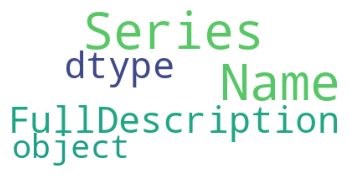

In [53]:
title_keyword('SOFTWARE QUALITY ENGINEER')

In [55]:
skill_list = [
    '.NET', '.NET Core', 'Active Directory', 'AI', 'Algorithms', 'Android',
    'Angular', 'Ansible', 'APIs', 'AutoCAD', 'Automated Testing', 'AWS',
    'Azure', 'BDD', 'Big Data', 'Business Intelligence', 'C', 'C#', 'C++',
    'CAD', 'CD', 'Cisco', 'Cloud Platforms', 'Code Reviews', 'Confluence',
    'Continuous Integration', 'CRM', 'CSS', 'Data Analysis', 'Data Modeling',
    'Data Science', 'Data Visualization', 'Data Warehouse', 'Database Design',
    'Design Patterns', 'DevOps', 'DNS', 'Docker', 'ETL', 'Firewalls',
    'FOR EMPLOYERS', 'GCP', 'Git', 'GitHub', 'Go', 'Google Analytics',
    'Graphic design', 'HTML', 'Illustrator', 'InDesign', 'Java', 'JavaScript',
    'Jenkins', 'Jira', 'Kanban', 'Kubernetes', 'Linux', 'Machine Learning',
    'Microservices', 'MongoDB', 'MS Project', 'MySQL', 'Network Switches',
    'Node.js', 'NoSQL', 'OO', 'Photoshop', 'PHP', 'Pivot Tables', 'Power BI',
    'PowerShell', 'PRINCE2', 'Python', 'R', 'React', 'RESTful APIs', 'Revit',
    'SaaS', 'Salesforce', 'SAP', 'Scripting Language', 'Scrum', 'SEO',
    'SharePoint', 'SOLID', 'SQL Server', 'Tableau', 'TDD', 'Terraform',
    'TypeScript', 'UI', 'Unit Testing', 'Unix', 'UX', 'Version Control',
    'Virtualization', 'VMware', 'Vue.js', 'Web Services'
]
#skills need to lower case and remove comma

In [59]:
skill_list = list(map(lowercase, skill_list))
skill_list = list(map(remove_numbers, skill_list))
skill_list = list(map(remove_punctuation, skill_list))
#df['Title'] = df['Title'].apply(remove_numbers)
skill_list


[' net',
 ' net core',
 'active directory',
 'ai',
 'algorithms',
 'android',
 'angular',
 'ansible',
 'apis',
 'autocad',
 'automated testing',
 'aws',
 'azure',
 'bdd',
 'big data',
 'business intelligence',
 'c',
 'c ',
 'c  ',
 'cad',
 'cd',
 'cisco',
 'cloud platforms',
 'code reviews',
 'confluence',
 'continuous integration',
 'crm',
 'css',
 'data analysis',
 'data modeling',
 'data science',
 'data visualization',
 'data warehouse',
 'database design',
 'design patterns',
 'devops',
 'dns',
 'docker',
 'etl',
 'firewalls',
 'for employers',
 'gcp',
 'git',
 'github',
 'go',
 'google analytics',
 'graphic design',
 'html',
 'illustrator',
 'indesign',
 'java',
 'javascript',
 'jenkins',
 'jira',
 'kanban',
 'kubernetes',
 'linux',
 'machine learning',
 'microservices',
 'mongodb',
 'ms project',
 'mysql',
 'network switches',
 'node js',
 'nosql',
 'oo',
 'photoshop',
 'php',
 'pivot tables',
 'power bi',
 'powershell',
 'prince',
 'python',
 'r',
 'react',
 'restful apis',
 'r